In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

## Setting the folder path 

In [5]:
BASE_DIR = "../"
data_dir = BASE_DIR  + "data/external/"
os.listdir(data_dir)

['Train_images',
 'Test_masks',
 'README.org~',
 'Train_masks',
 'README.org',
 'Test_images']

In [11]:
images_path = data_dir + "Train_images/" 
masks_path  = data_dir + "Train_masks/" 

In [12]:
images = sorted(os.listdir(images_path))
print(len(images))
images

5


['Sandstone_Versa0000.tif',
 'Sandstone_Versa0050.tif',
 'Sandstone_Versa0100.tif',
 'Sandstone_Versa0150.tif',
 'Sandstone_Versa0200.tif']

In [13]:
masks = sorted(os.listdir(masks_path))
masks

['Sandstone_Versa0000.tif',
 'Sandstone_Versa0050.tif',
 'Sandstone_Versa0100.tif',
 'Sandstone_Versa0150.tif',
 'Sandstone_Versa0200.tif']

## Let's view the image and it's mask

(1024, 996)
(1024, 996)


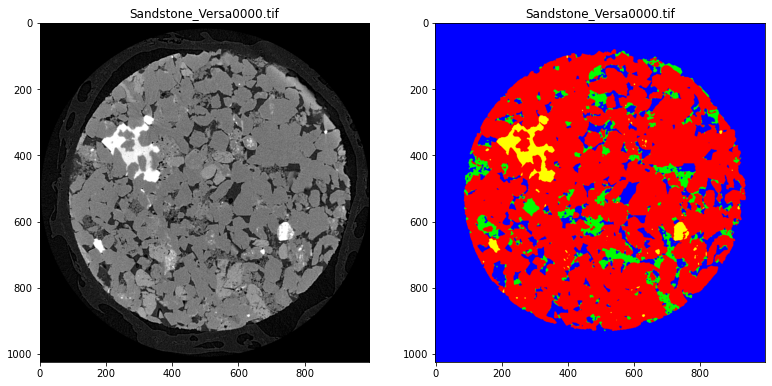

In [68]:
for image, mask in zip(images, masks):
    fig, ax = plt.subplots(1,2,figsize=(13,13))
    
    read_image = cv2.imread(images_path + image, 0) 
    print(read_image.shape)
    
    read_mask = cv2.imread(masks_path + mask) 
    read_mask_rgb = cv2.cvtColor(read_mask, cv2.COLOR_BGR2RGB)
    read_mask_gray = cv2.cvtColor(read_mask, cv2.COLOR_BGR2GRAY)
    print(read_mask_gray.shape)
    
    ax[0].imshow(read_image, cmap="gray")
    ax[0].set_title(image)
    ax[1].imshow(read_mask_rgb)
    ax[1].set_title( mask)
    
    break

## Feature Extraction

### Pixel Values Extraction

#### For our image

In [38]:
pixel_values_image = read_image.reshape(-1)
pixel_values_image.shape

(1019904,)

##### lets see the pixel value histogram

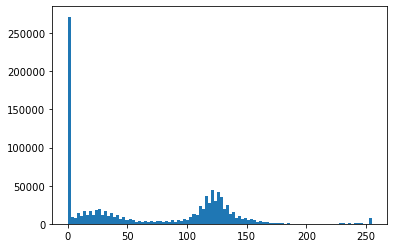

In [73]:
plt.hist(pixel_values_image, bins=100, range=(0,255))
plt.show()

#### For our label/mask

In [57]:
## we are taking gray mask because we want single label 
pixel_value_mask = read_mask_gray.reshape(-1)
pixel_value_mask.shape

(1019904,)

In [62]:
np.unique(pixel_value_mask) ## these are the four gray intensities

array([ 29,  76, 150, 226], dtype=uint8)

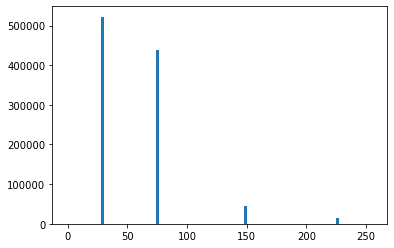

In [74]:
plt.hist(pixel_value_mask, bins=100, range=(0,255))
plt.show()

### Gabor Filters

In [157]:
"""
# sigma = sigma
# lam  = lambda
# theta = theta 
# gamma = gamma 

# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)

ksize is the size of the Gabor kernel. 
If ksize = (a, b), we then have a Gabor kernel of size a x b pixels. 
As with many other convolution kernels, 
ksize is preferably odd and the kernel is a square (just for the sake of uniformity).

sigma is the standard deviation of the Gaussian function used in the Gabor filter.

theta is the orientation of the normal to the parallel stripes of the Gabor function.

lambda is the wavelength of the sinusoidal factor in the above equation.

gamma is the spatial aspect ratio.

psi is the phase offset.

ktype indicates the type and range of values that each pixel in the Gabor kernel can hold. 

Reading links
- https://cvtuts.wordpress.com/2014/04/27/gabor-filters-a-practical-overview/
- https://medium.com/@anuj_shah/through-the-eyes-of-gabor-filter-17d1fdb3ac97
"""
ksize = 9
phi = 0

count = 0
GABOR_FILTER_BANK = {}
for i in range(3): # 0, 45, and 90 degree
    theta = i/4.0 * np.pi
    for sigma in (1, 3):
        for lam in np.arange(0.1, np.pi, np.pi/4.0): # 0 to 135 degree with 45degree step
            for gamma in (0.05, 0.5):
                gabor_name = "gabor_" + str(count) 
#                 if lam==0:
#                     print(f"{gabor_name} -> {theta}, {sigma}, {lam}, {gamma}")
                kernel = cv2.getGaborKernel((ksize, ksize),
                                            sigma,
                                            theta,
                                            lam,
                                            gamma,
                                            phi,
                                            ktype=cv2.CV_32F)
        
                GABOR_FILTER_BANK[gabor_name] = kernel
                count +=1
print(count)  # 48
print("done")

48
done


In [159]:
GABOR_FILTER_BANK.keys()

dict_keys(['gabor_0', 'gabor_1', 'gabor_2', 'gabor_3', 'gabor_4', 'gabor_5', 'gabor_6', 'gabor_7', 'gabor_8', 'gabor_9', 'gabor_10', 'gabor_11', 'gabor_12', 'gabor_13', 'gabor_14', 'gabor_15', 'gabor_16', 'gabor_17', 'gabor_18', 'gabor_19', 'gabor_20', 'gabor_21', 'gabor_22', 'gabor_23', 'gabor_24', 'gabor_25', 'gabor_26', 'gabor_27', 'gabor_28', 'gabor_29', 'gabor_30', 'gabor_31', 'gabor_32', 'gabor_33', 'gabor_34', 'gabor_35', 'gabor_36', 'gabor_37', 'gabor_38', 'gabor_39', 'gabor_40', 'gabor_41', 'gabor_42', 'gabor_43', 'gabor_44', 'gabor_45', 'gabor_46', 'gabor_47'])

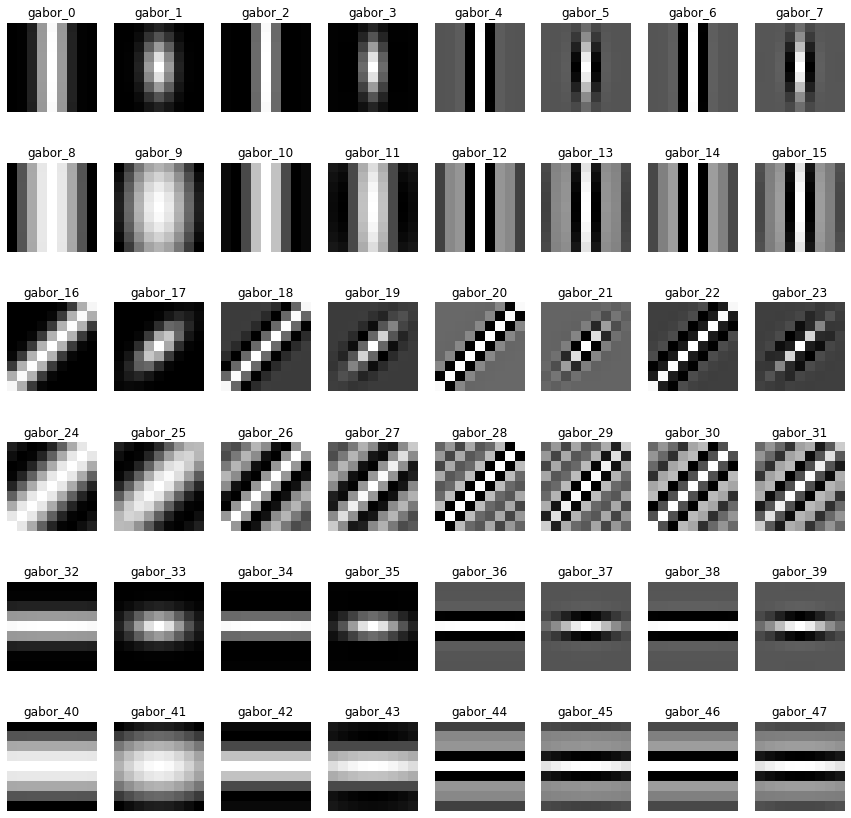

In [160]:
fig = plt.figure(figsize=(15,15))

for i,filters in enumerate(GABOR_FILTER_BANK):
#     print(filters.shape)
    ax = plt.subplot(6, 8, i+1)
    plt.imshow(GABOR_FILTER_BANK[filters], cmap="gray")
    plt.axis("off")
    ax.set_title(f"{filters}")


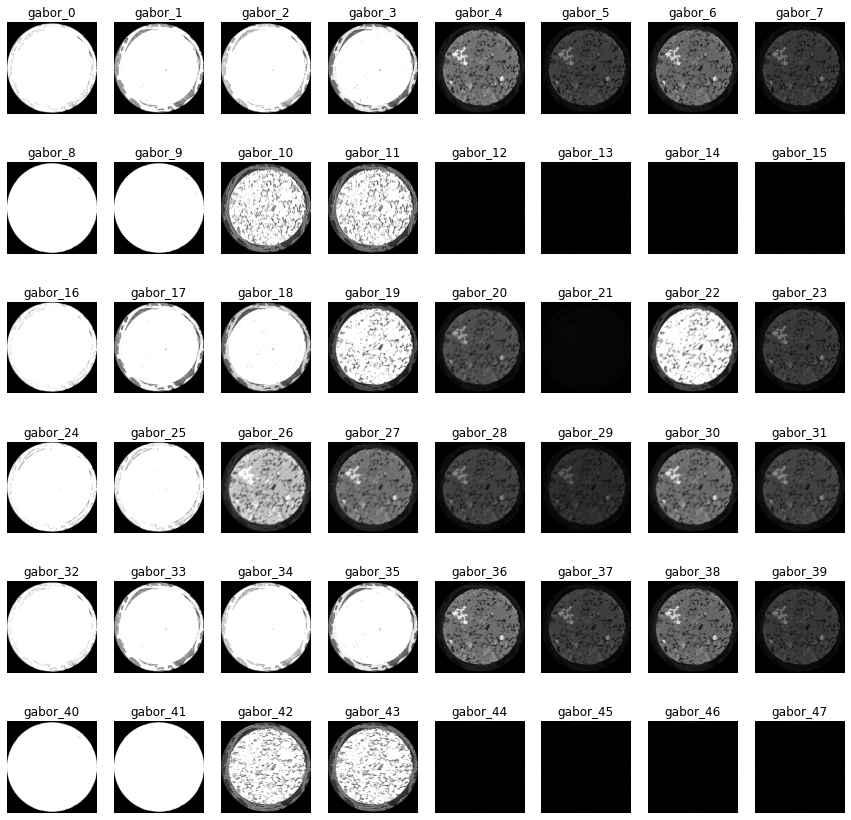

In [161]:
fig = plt.figure(figsize=(15,15))

for i,filters in enumerate(GABOR_FILTER_BANK):
#     print(filters.shape)
    ax = plt.subplot(6, 8, i+1)
    filter_applied = cv2.filter2D(read_image, cv2.CV_8UC3, GABOR_FILTER_BANK[filters])
    plt.imshow(filter_applied, cmap="gray")
    plt.axis("off")
    ax.set_title(f"{filters}")


## Creating the Dataframe object